In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import random

In [8]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [11]:
target = df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
target

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [12]:
x=df.drop(['Id','Species'],axis=1)
print(x)
y=df['Species']
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [13]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(x,y,test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scalar=sc.fit(trainX)
trainX_scaled=scalar.transform(trainX)
testX_scaled=scalar.transform(testX)

In [15]:
from sklearn.neural_network import MLPClassifier # Correct the typo in the module name
mlp_clf=MLPClassifier(hidden_layer_sizes=(200),activation='relu',solver='adam',max_iter=100)
mlp_clf.fit(trainX_scaled,trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=200, max_iter=100)

<function matplotlib.pyplot.show(close=None, block=None)>

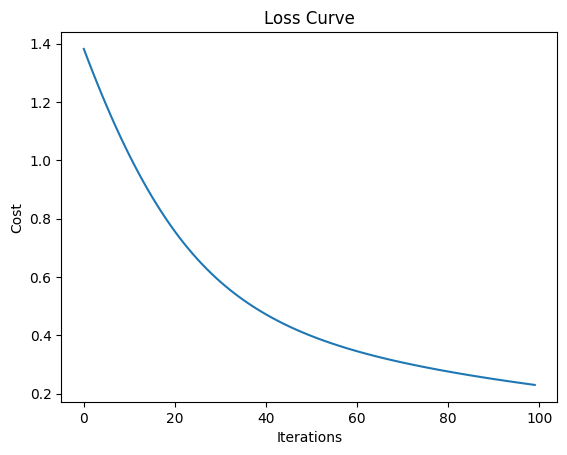

In [16]:
plt.plot(mlp_clf.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show

In [23]:
y_pred = mlp_clf.predict(testX_scaled)
print(y_pred)
from sklearn.metrics import accuracy_score # Correct the module name to 'metrics'
print('Accuracy:',(accuracy_score(testY,y_pred)))

['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor']
Accuracy: 0.8666666666666667
